In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
df = pd.read_csv("Documents/cleaned_vehicles1.csv")


In [71]:
# Keep only vehicles from 1980 to 2022 to remove unrealistic year entries
df = df[(df['year'] >= 1980) & (df['year'] <= 2022)]

# Remove vehicles with extremely high mileage (over 500,000 miles)
df = df[df['odometer'] < 500000]

# Drop rows where 'year' or 'odometer' is missing, since these are critical features
df = df.dropna(subset=['year', 'odometer'])

# Define a list of categorical columns that will be cleaned
categorical_cols = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
                    'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']

# Fill missing values in categorical columns with the placeholder 'unknown'
df[categorical_cols] = df[categorical_cols].fillna('unknown')

# Drop duplicate listings based on 'model', 'year', 'odometer', and 'price'
df = df.drop_duplicates(subset=['model', 'year', 'odometer', 'price'], keep='first')



In [75]:
df = pd.read_csv("Documents/cleaned_vehicles1.csv")

df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
1,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
2,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
3,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
4,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359617 entries, 0 to 359616
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            359617 non-null  int64  
 1   region        359617 non-null  object 
 2   price         359617 non-null  int64  
 3   year          359617 non-null  float64
 4   manufacturer  359617 non-null  object 
 5   model         359617 non-null  object 
 6   condition     223528 non-null  object 
 7   cylinders     213637 non-null  object 
 8   fuel          357668 non-null  object 
 9   odometer      359617 non-null  float64
 10  title_status  353555 non-null  object 
 11  transmission  358162 non-null  object 
 12  VIN           225366 non-null  object 
 13  drive         251996 non-null  object 
 14  size          100417 non-null  object 
 15  type          285319 non-null  object 
 16  paint_color   257213 non-null  object 
 17  state         359617 non-null  object 
dtypes: f

In [79]:
df.describe(include='all')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,3.596170e+05,359617,359617.00000,359617.000000,359617,359617,223528,213637,357668,359617.000000,353555,358162,225366,251996,100417,285319,257213,359617
unique,NaN,404,NaN,NaN,41,21619,6,8,5,NaN,6,3,98453,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3170,NaN,NaN,62074,6860,111995,82292,303704,NaN,341593,280443,261,112902,52461,74609,67163,40390
mean,7.311482e+09,NaN,19291.17750,2011.601771,NaN,NaN,NaN,NaN,NaN,92938.354669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.381576e+06,NaN,14432.31018,7.979529,NaN,NaN,NaN,NaN,NaN,63085.724332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.301583e+09,NaN,501.00000,1951.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.308096e+09,NaN,7950.00000,2008.000000,NaN,NaN,NaN,NaN,NaN,38890.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.312594e+09,NaN,15990.00000,2013.000000,NaN,NaN,NaN,NaN,NaN,87849.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.315244e+09,NaN,27990.00000,2017.000000,NaN,NaN,NaN,NaN,NaN,135497.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


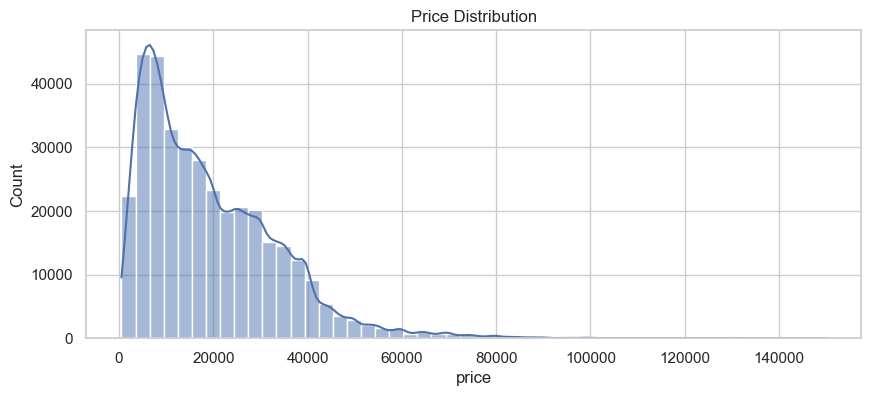

In [81]:
plt.figure(figsize=(10, 4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

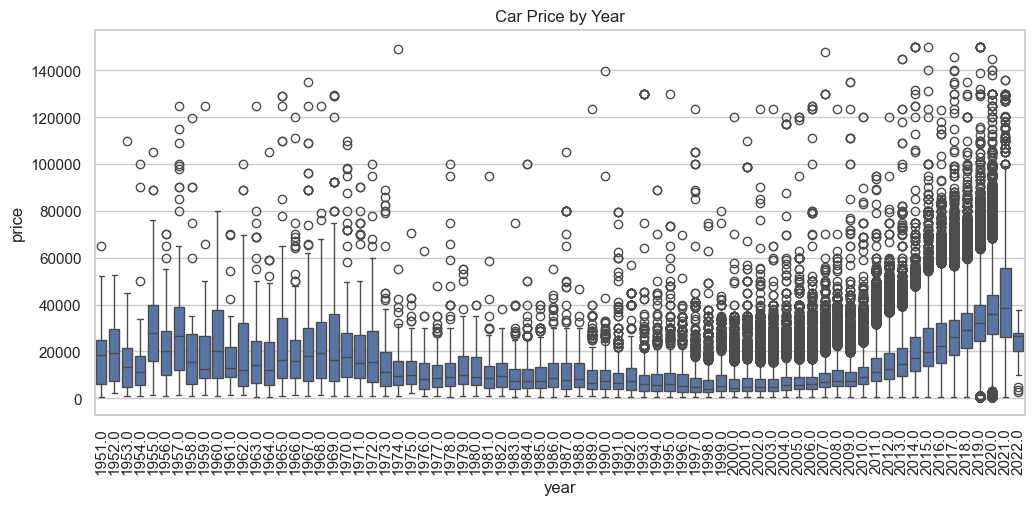

In [83]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='year', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Car Price by Year')
plt.show()

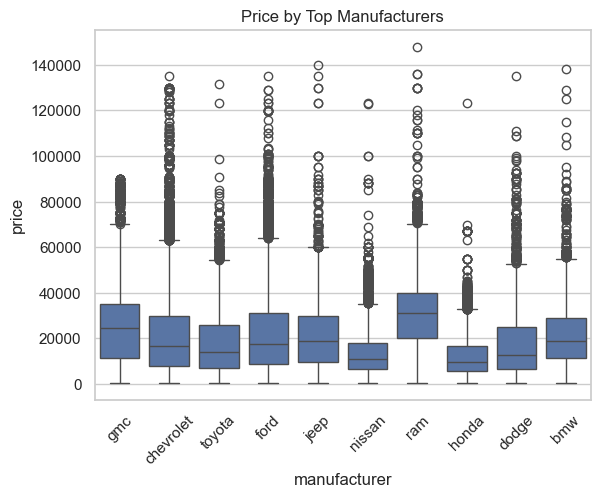

In [14]:
top_m = df['manufacturer'].value_counts().nlargest(10).index
sns.boxplot(x='manufacturer', y='price', data=df[df['manufacturer'].isin(top_m)])
plt.xticks(rotation=45)
plt.title('Price by Top Manufacturers')
plt.show()

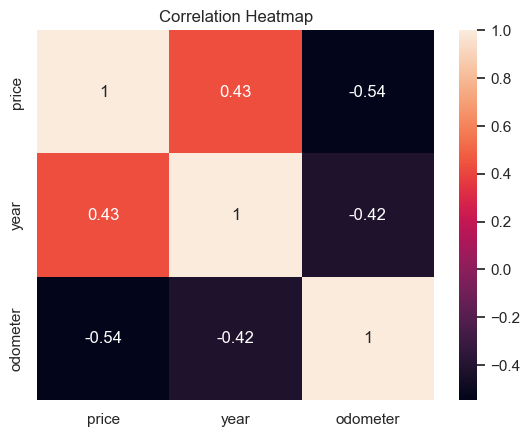

In [16]:
sns.heatmap(df[['price', 'year', 'odometer']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [34]:
features = ['year', 'odometer', 'manufacturer', 'condition', 'fuel', 'transmission', 'type', 'drive']
df_model = df[features + ['price']].dropna()
df_encoded = pd.get_dummies(df_model, drop_first=True)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression R²:', r2_score(y_test, y_pred_lr))
print('Linear Regression RMSE:', mean_squared_error(y_test, y_pred_lr, squared=False))

Linear Regression R²: 0.6476772052066277
Linear Regression RMSE: 7761.6869552033695


In [85]:
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print('Ridge R²:', r2_score(y_test, y_pred_ridge))
print('Ridge RMSE:', mean_squared_error(y_test, y_pred_ridge, squared=False))

Ridge R²: 0.6476979653845891
Ridge RMSE: 7761.458278009364


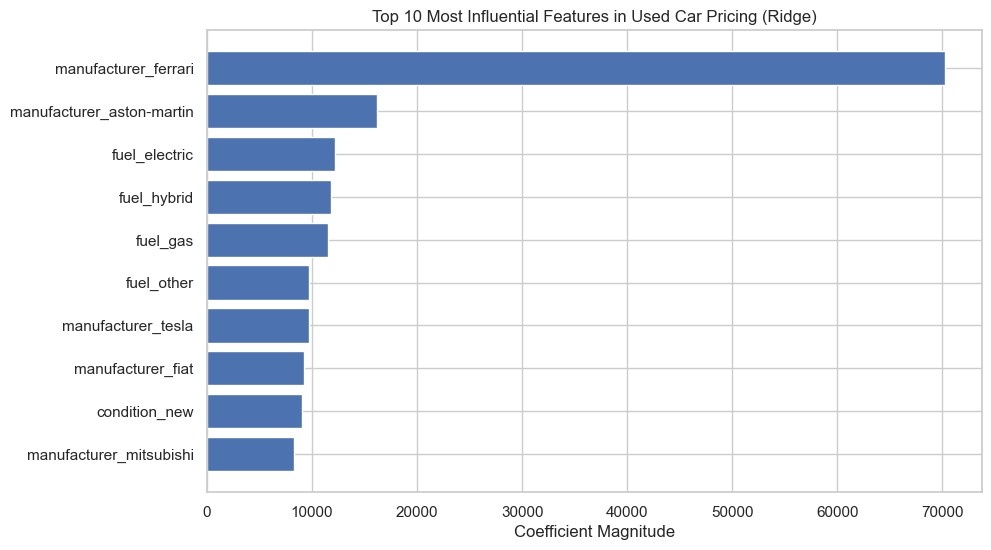

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# For Ridge or Linear Regression
coefficients = ridge.coef_
feature_names = X_train.columns

# Sort by absolute value of importance
sorted_idx = np.argsort(np.abs(coefficients))[::-1]

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx][:10], np.abs(coefficients[sorted_idx])[:10])
plt.xlabel('Coefficient Magnitude')
plt.title('Top 10 Most Influential Features in Used Car Pricing (Ridge)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


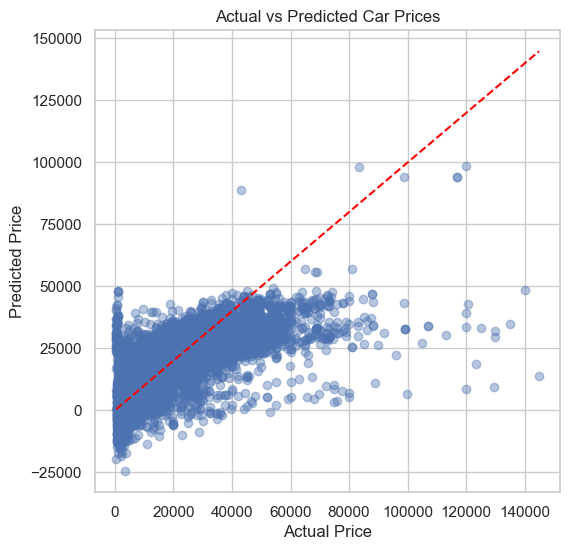

In [53]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.grid(True)
plt.show()


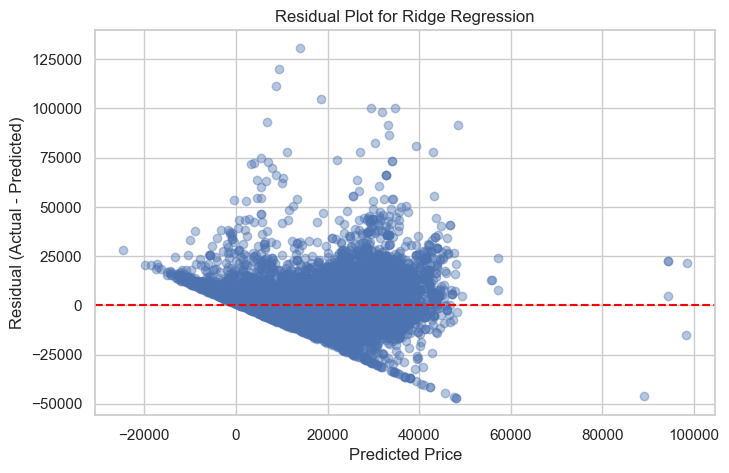

In [55]:
residuals = y_test - y_pred_ridge

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_ridge, residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot for Ridge Regression')
plt.grid(True)
plt.show()


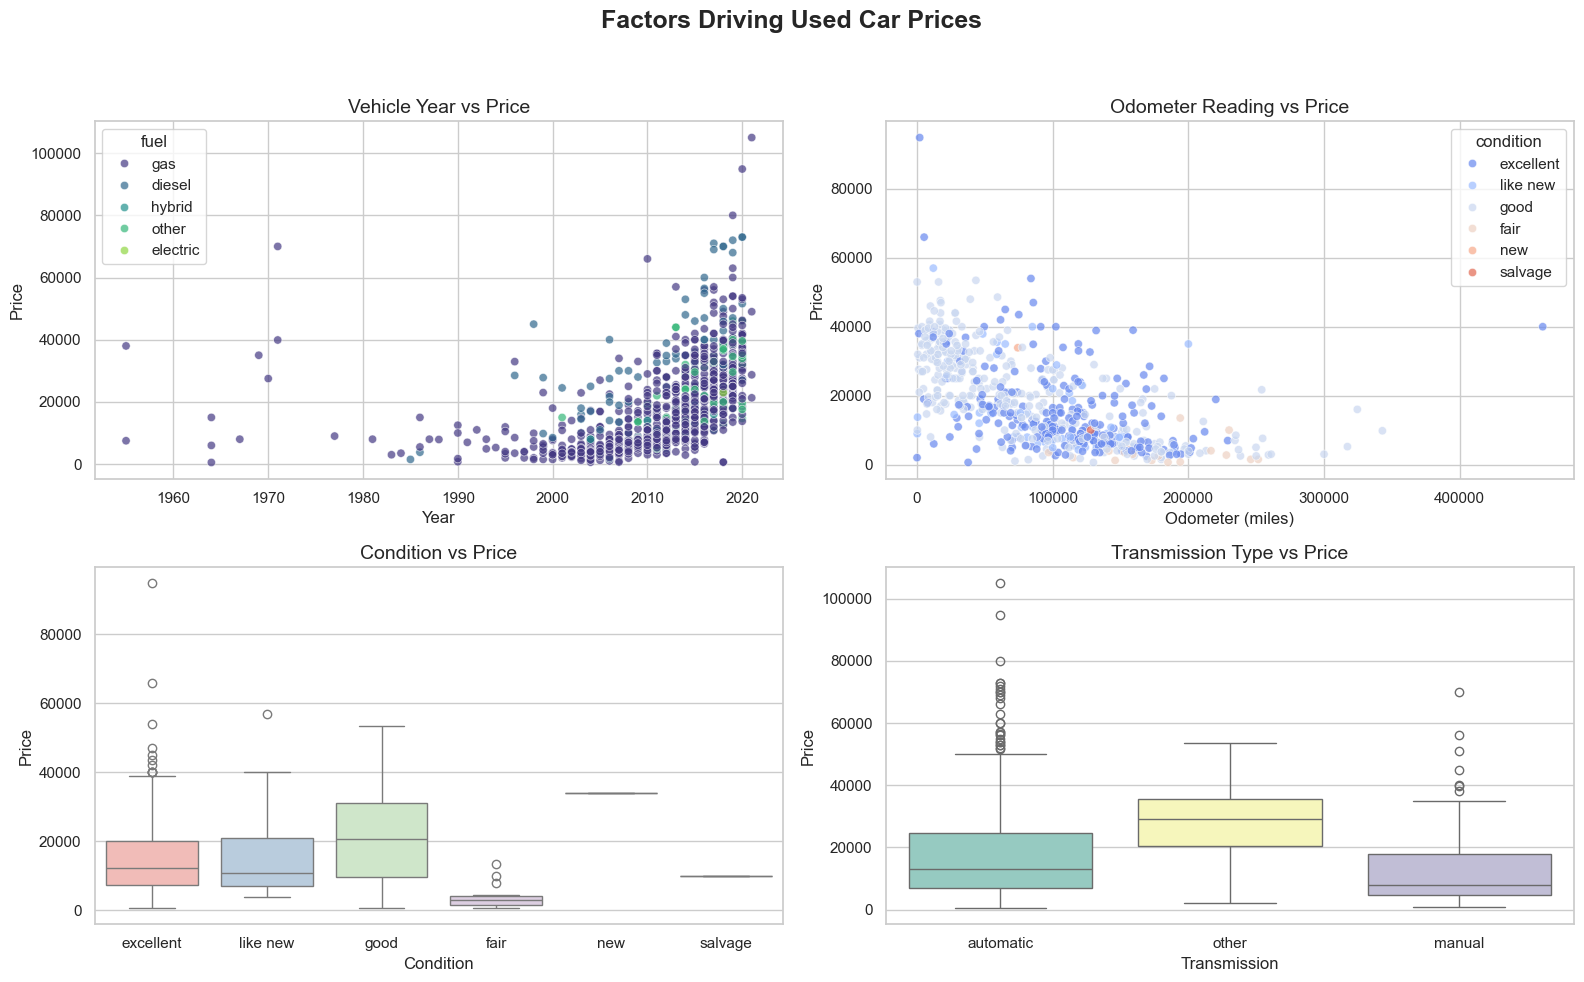

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a visually engaging color palette
sns.set(style="whitegrid", palette="Set2")

# Sample a manageable number of rows
df_plot = df.sample(1000, random_state=1)

# Create the subplot structure
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Factors Driving Used Car Prices", fontsize=18, fontweight='bold')

# --- Continuous Variable: Year vs Price ---
sns.scatterplot(data=df_plot, x='year', y='price', hue='fuel', palette='viridis', ax=axes[0, 0], alpha=0.7)
axes[0, 0].set_title("Vehicle Year vs Price", fontsize=14)
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Price")

# --- Continuous Variable: Odometer vs Price ---
sns.scatterplot(data=df_plot, x='odometer', y='price', hue='condition', palette='coolwarm', ax=axes[0, 1], alpha=0.7)
axes[0, 1].set_title("Odometer Reading vs Price", fontsize=14)
axes[0, 1].set_xlabel("Odometer (miles)")
axes[0, 1].set_ylabel("Price")

# --- Categorical Variable: Condition vs Price ---
sns.boxplot(data=df_plot, x='condition', y='price', palette='Pastel1', ax=axes[1, 0])
axes[1, 0].set_title("Condition vs Price", fontsize=14)
axes[1, 0].set_xlabel("Condition")
axes[1, 0].set_ylabel("Price")

# --- Categorical Variable: Transmission vs Price ---
sns.boxplot(data=df_plot, x='transmission', y='price', palette='Set3', ax=axes[1, 1])
axes[1, 1].set_title("Transmission Type vs Price", fontsize=14)
axes[1, 1].set_xlabel("Transmission")
axes[1, 1].set_ylabel("Price")

# Improve layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [93]:
from xgboost import XGBRegressor
!pip install xgboost


XGBoost RMSE: $6,141.11
XGBoost R²: 0.7794


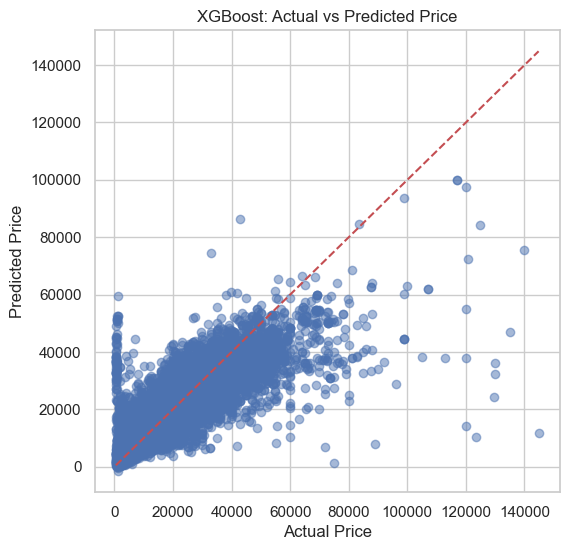

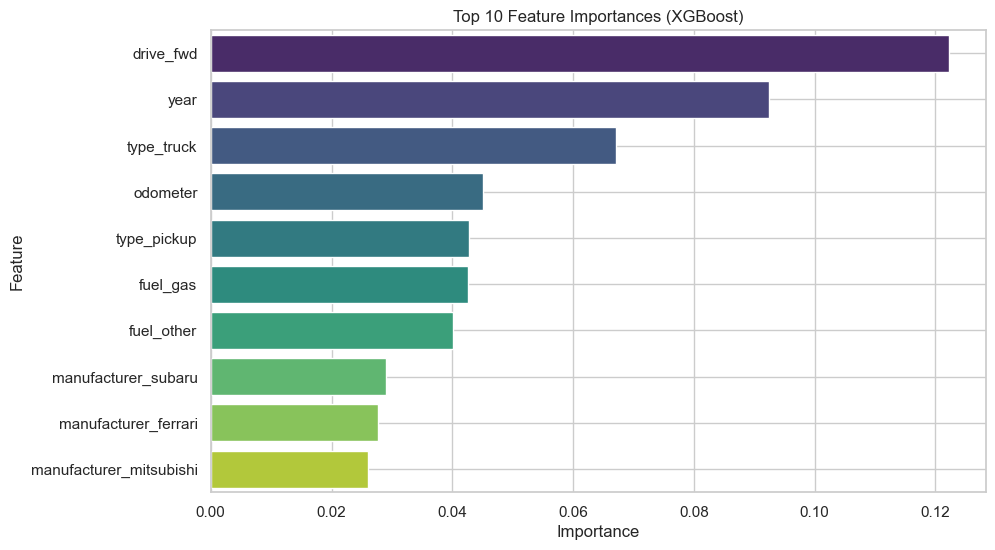

In [95]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load your cleaned data
df = pd.read_csv("Documents/cleaned_vehicles1.csv")

# Step 3: Feature selection and preprocessing
features = ['year', 'odometer', 'manufacturer', 'condition', 'fuel', 'transmission', 'type', 'drive']
df_model = df[features + ['price']].dropna()
df_encoded = pd.get_dummies(df_model, drop_first=True)

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = xgb_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost RMSE: ${rmse:,.2f}")
print(f"XGBoost R²: {r2:.4f}")

# Step 7: Plot Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBoost: Actual vs Predicted Price")
plt.grid(True)
plt.show()

# Step 8: Feature importance
importances = xgb_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.grid(True)
plt.show()


In [97]:
features = ['year', 'odometer', 'manufacturer', 'condition', 'fuel', 
            'transmission', 'type', 'drive', 'paint_color']


In [103]:
import pandas as pd

# Load cleaned vehicle data
df = pd.read_csv("documents/cleaned_vehicles1.csv")

# Define high-demand filters
high_value = (
    (df['year'] >= 2018) &
    (df['odometer'] < 80000) &
    (df['condition'].isin(['excellent', 'good'])) &
    (df['manufacturer'].isin(['toyota', 'honda', 'ford', 'chevrolet', 'subaru'])) &
    (df['transmission'] == 'automatic') &
    (df['drive'].isin(['4wd', 'awd']))
)

# Apply filters
df_high_demand = df[high_value]

# Show top 10 cars meeting criteria
print(df_high_demand[['year', 'manufacturer', 'model', 'price', 'odometer', 'condition', 'drive']].head(10))

        year manufacturer                  model  price  odometer  condition  \
7     2019.0       toyota                 tacoma  35000   43000.0  excellent   
307   2021.0    chevrolet                  tahoe  72900   19129.0       good   
309   2019.0    chevrolet                   trax  17000   14898.0       good   
1387  2021.0       toyota             tacoma 4wd  40900    1582.0       good   
2406  2019.0       toyota                 tacoma  29000   29500.0  excellent   
2696  2018.0    chevrolet              silverado  48200   33467.0  excellent   
3222  2020.0    chevrolet  silverado 1500 double  41990   12880.0       good   
3535  2018.0         ford           f-150 raptor  59000   79000.0  excellent   
3791  2021.0       toyota             tacoma 4wd  40900    1582.0       good   
4156  2021.0       toyota             tacoma 4wd  40900    1582.0       good   

     drive  
7      4wd  
307    4wd  
309    4wd  
1387   4wd  
2406   4wd  
2696   4wd  
3222   4wd  
3535   4wd  
37

In [109]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("documents/cleaned_vehicles1.csv")

# Apply filters for high-demand vehicle profile
high_value = (
    (df['year'] >= 2018) &
    (df['odometer'] < 80000) &
    (df['condition'].str.lower().isin(['excellent', 'good'])) &
    (df['manufacturer'].str.lower().isin(['toyota', 'honda', 'ford', 'chevrolet', 'subaru'])) &
    (df['transmission'].str.lower() == 'automatic') &
    (df['drive'].str.lower().isin(['4wd', 'awd']))
)

# Filter the dataset
df_high_demand = df[high_value]

# Show summary or preview
print("Top High-Demand Vehicles:")
print(df_high_demand[['year', 'manufacturer', 'model', 'price', 'odometer', 'condition', ]].head(10))


Top High-Demand Vehicles:
        year manufacturer                  model  price  odometer  condition
7     2019.0       toyota                 tacoma  35000   43000.0  excellent
307   2021.0    chevrolet                  tahoe  72900   19129.0       good
309   2019.0    chevrolet                   trax  17000   14898.0       good
1387  2021.0       toyota             tacoma 4wd  40900    1582.0       good
2406  2019.0       toyota                 tacoma  29000   29500.0  excellent
2696  2018.0    chevrolet              silverado  48200   33467.0  excellent
3222  2020.0    chevrolet  silverado 1500 double  41990   12880.0       good
3535  2018.0         ford           f-150 raptor  59000   79000.0  excellent
3791  2021.0       toyota             tacoma 4wd  40900    1582.0       good
4156  2021.0       toyota             tacoma 4wd  40900    1582.0       good
